In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Milind-Shende/Credit-Card/main/Notebook/UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Dropping Of ID Column
df.drop('ID',axis=1,inplace=True)

In [5]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.rename(columns={"default.payment.next.month":"Default"},inplace=True)

In [6]:
df['MARRIAGE'].replace({0:3},inplace=True)
df['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)
df['Default'].replace({0:'No',1:'Yes'},inplace=True)

In [7]:
for i in range(1,7):
    PAY='PAY_'+str(i)
    df[PAY]=df[PAY].replace({-1:0})
    df[PAY]=df[PAY].replace({-2:0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [9]:
df['Default'].value_counts()

No     23364
Yes     6636
Name: Default, dtype: int64

In [10]:
X = df.drop('Default', axis = 1)
y=df['Default']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [12]:
# X=np.array(X)
# y=np.array(y)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
target_encoder=LabelEncoder()
y_train=target_encoder.fit_transform(y_train)
y_test=target_encoder.transform(y_test)

In [15]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [16]:
smt=SMOTETomek()
X_train,y_train=smt.fit_resample(X_train,y_train)
X_test,y_test=smt.fit_resample(X_test,y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36332, 23)
(9084, 23)
(36332,)
(9084,)


In [30]:
#Logistic Regression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred_clf_train=clf.predict(X_train)
y_pred_clf_test=clf.predict(X_test)
Accuracy_clf_train=accuracy_score(y_train,y_pred_clf_train)
cm_clf_train = confusion_matrix(y_train, y_pred_clf_train)
cr_clf_train=classification_report(y_train,y_pred_clf_train)
re_call_clf_train=recall_score(y_train,y_pred_clf_train)
precision_clf_train=precision_score(y_train,y_pred_clf_train)
f1_clf_train=f1_score(y_train,y_pred_clf_train)
#==========================================================
Accuracy_clf_test=accuracy_score(y_test,y_pred_clf_test)
cm_clf_test= confusion_matrix(y_test, y_pred_clf_test)
cr_clf_test=classification_report(y_test,y_pred_clf_test)
re_call_clf_test=recall_score(y_test,y_pred_clf_test)
precision_clf_test=precision_score(y_test,y_pred_clf_test)
f1_clf_test=f1_score(y_test,y_pred_clf_test)
#=========================================================
print("re_call_clf_train:-",re_call_clf_train)
print("#"*40)
print("precision_clf_train:-",precision_clf_train)
print("#"*40)
print("f1_clf_train:-",f1_clf_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_clf_train)
print("#"*40)
print("Accuracy_clf_train:-",Accuracy_clf_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_clf_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_clf_train))
print("#"*40)
print("re_call_clf_test:-",re_call_clf_test)
print("#"*40)
print("precision_clf_test:-",precision_clf_test)
print("#"*40)
print("f1_clf_test:-",f1_clf_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_clf_test)
print("#"*40)
print("Accuracy_clf_test:-",Accuracy_clf_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_clf_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_clf_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_clf_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_clf_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_clf_test)))

re_call_clf_train:- 0.5717984026438998
########################################
precision_clf_train:- 0.7859630526953362
########################################
f1_clf_train:- 0.6619902432802984
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.66      0.84      0.74     18155
           1       0.79      0.57      0.66     18155

    accuracy                           0.71     36310
   macro avg       0.72      0.71      0.70     36310
weighted avg       0.72      0.71      0.70     36310

########################################
Accuracy_clf_train:- 0.7080418617460754
########################################
Confusion Matrix Train:- [[15328  2827]
 [ 7774 10381]]
########################################
col_0      0      1
row_0              
0      15328   2827
1       7774  10381
########################################
re_call_clf_test:- 0.5721502306171755
###########################

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Load the data
X_train, y_train

# Define hyperparameter grid
param_grid = {'C': uniform(loc=0, scale=4),
              'penalty': ['l1', 'l2', 'elasticnet', None]}

# Create Logistic Regression model
log_reg = LogisticRegression()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'C': 2.832290311184182, 'penalty': 'l2'}


In [31]:
#Logistic Regression
clf=LogisticRegression(C= 2.832290311184182, penalty ='l2')
clf.fit(X_train,y_train)
y_pred_clf_train=clf.predict(X_train)
y_pred_clf_test=clf.predict(X_test)
Accuracy_clf_train=accuracy_score(y_train,y_pred_clf_train)
cm_clf_train = confusion_matrix(y_train, y_pred_clf_train)
cr_clf_train=classification_report(y_train,y_pred_clf_train)
re_call_clf_train=recall_score(y_train,y_pred_clf_train)
precision_clf_train=precision_score(y_train,y_pred_clf_train)
f1_clf_train=f1_score(y_train,y_pred_clf_train)
#==========================================================
Accuracy_clf_test=accuracy_score(y_test,y_pred_clf_test)
cm_clf_test= confusion_matrix(y_test, y_pred_clf_test)
cr_clf_test=classification_report(y_test,y_pred_clf_test)
re_call_clf_test=recall_score(y_test,y_pred_clf_test)
precision_clf_test=precision_score(y_test,y_pred_clf_test)
f1_clf_test=f1_score(y_test,y_pred_clf_test)
#=========================================================
print("re_call_clf_train:-",re_call_clf_train)
print("#"*40)
print("precision_clf_train:-",precision_clf_train)
print("#"*40)
print("f1_clf_train:-",f1_clf_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_clf_train)
print("#"*40)
print("Accuracy_clf_train:-",Accuracy_clf_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_clf_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_clf_train))
print("#"*40)
print("re_call_clf_test:-",re_call_clf_test)
print("#"*40)
print("precision_clf_test:-",precision_clf_test)
print("#"*40)
print("f1_clf_test:-",f1_clf_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_clf_test)
print("#"*40)
print("Accuracy_clf_test:-",Accuracy_clf_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_clf_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_clf_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_clf_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_clf_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_clf_test)))

re_call_clf_train:- 0.5717984026438998
########################################
precision_clf_train:- 0.7859630526953362
########################################
f1_clf_train:- 0.6619902432802984
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.66      0.84      0.74     18155
           1       0.79      0.57      0.66     18155

    accuracy                           0.71     36310
   macro avg       0.72      0.71      0.70     36310
weighted avg       0.72      0.71      0.70     36310

########################################
Accuracy_clf_train:- 0.7080418617460754
########################################
Confusion Matrix Train:- [[15328  2827]
 [ 7774 10381]]
########################################
col_0      0      1
row_0              
0      15328   2827
1       7774  10381
########################################
re_call_clf_test:- 0.5721502306171755
###########################

In [139]:
#### Calculate the ROC Curve Logistic Regression
fpr_clf_train, tpr_clf_train, thresholds_clf_train = roc_curve(y_train,y_pred_clf_train)
fpr_clf_test, tpr_clf_test, thresholds_clf_test = roc_curve(y_test,y_pred_clf_test)

In [140]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

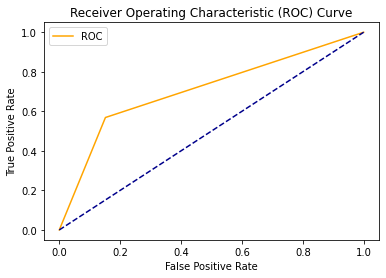

In [141]:
plot_roc_curve(fpr_clf_train,tpr_clf_train)

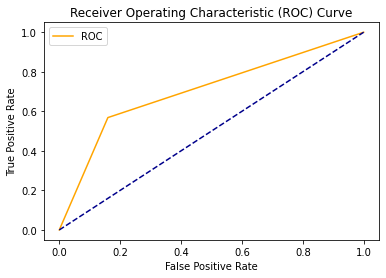

In [142]:
plot_roc_curve(fpr_clf_test,tpr_clf_test)

In [127]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt_train=dt.predict(X_train)
y_pred_dt_test=dt.predict(X_test)
Accuracy_dt_train=accuracy_score(y_train,y_pred_dt_train)
cm_dt_train = confusion_matrix(y_train, y_pred_dt_train)
cr_dt_train=classification_report(y_train,y_pred_dt_train)
re_call_dt_train=recall_score(y_train,y_pred_dt_train)
precision_dt_train=precision_score(y_train,y_pred_dt_train)
f1_dt_train=f1_score(y_train,y_pred_dt_train)
#==========================================================
Accuracy_dt_test=accuracy_score(y_test,y_pred_dt_test)
cm_dt_test= confusion_matrix(y_test, y_pred_dt_test)
cr_dt_test=classification_report(y_test,y_pred_dt_test)
re_call_dt_test=recall_score(y_test,y_pred_dt_test)
precision_dt_test=precision_score(y_test,y_pred_dt_test)
f1_dt_test=f1_score(y_test,y_pred_dt_test)
#=========================================================
print("re_call_dt_train:-",re_call_dt_train)
print("#"*40)
print("precision_dt_train:-",precision_dt_train)
print("#"*40)
print("f1_dt_train:-",f1_dt_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_dt_train)
print("#"*40)
print("Accuracy_dt_train:-",Accuracy_dt_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_dt_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_dt_train))
print("#"*40)
print("re_call_dt_test:-",re_call_dt_test)
print("#"*40)
print("precision_dt_test:-",precision_dt_test)
print("#"*40)
print("f1_dt_test:-",f1_dt_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_dt_test)
print("#"*40)
print("Accuracy_dt_test:-",Accuracy_dt_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_dt_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_dt_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_dt_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_dt_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_dt_test)))

re_call_dt_train:- 0.9995591557833251
########################################
precision_dt_train:- 1.0
########################################
f1_dt_train:- 0.999779529295045
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       1.00      1.00      1.00     18147
           1       1.00      1.00      1.00     18147

    accuracy                           1.00     36294
   macro avg       1.00      1.00      1.00     36294
weighted avg       1.00      1.00      1.00     36294

########################################
Accuracy_dt_train:- 0.9997795778916625
########################################
Confusion Matrix Train:- [[18147     0]
 [    8 18139]]
########################################
col_0      0      1
row_0              
0      18147      0
1          8  18139
########################################
re_call_dt_test:- 0.6594393342093736
########################################
precisi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Load the data
X_train, y_train

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

# Create Decision Tree model
dtree = DecisionTreeClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(dtree, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'gini'}


In [128]:
#Decision Tree
dt=DecisionTreeClassifier(splitter= 'best', min_samples_split =2, min_samples_leaf= 1, max_depth =9, criterion= 'gini')
dt.fit(X_train,y_train)
y_pred_dt_train=dt.predict(X_train)
y_pred_dt_test=dt.predict(X_test)
Accuracy_dt_train=accuracy_score(y_train,y_pred_dt_train)
cm_dt_train = confusion_matrix(y_train, y_pred_dt_train)
cr_dt_train=classification_report(y_train,y_pred_dt_train)
re_call_dt_train=recall_score(y_train,y_pred_dt_train)
precision_dt_train=precision_score(y_train,y_pred_dt_train)
f1_dt_train=f1_score(y_train,y_pred_dt_train)
#==========================================================
Accuracy_dt_test=accuracy_score(y_test,y_pred_dt_test)
cm_dt_test= confusion_matrix(y_test, y_pred_dt_test)
cr_dt_test=classification_report(y_test,y_pred_dt_test)
re_call_dt_test=recall_score(y_test,y_pred_dt_test)
precision_dt_test=precision_score(y_test,y_pred_dt_test)
f1_dt_test=f1_score(y_test,y_pred_dt_test)
#=========================================================
print("re_call_dt_train:-",re_call_dt_train)
print("#"*40)
print("precision_dt_train:-",precision_dt_train)
print("#"*40)
print("f1_dt_train:-",f1_dt_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_dt_train)
print("#"*40)
print("Accuracy_dt_train:-",Accuracy_dt_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_dt_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_dt_train))
print("#"*40)
print("re_call_dt_test:-",re_call_dt_test)
print("#"*40)
print("precision_dt_test:-",precision_dt_test)
print("#"*40)
print("f1_dt_test:-",f1_dt_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_dt_test)
print("#"*40)
print("Accuracy_dt_test:-",Accuracy_dt_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_dt_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_dt_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_dt_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_dt_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_dt_test)))

re_call_dt_train:- 0.7350526257783656
########################################
precision_dt_train:- 0.8167401420524124
########################################
f1_dt_train:- 0.7737463383508804
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.76      0.84      0.80     18147
           1       0.82      0.74      0.77     18147

    accuracy                           0.79     36294
   macro avg       0.79      0.79      0.78     36294
weighted avg       0.79      0.79      0.78     36294

########################################
Accuracy_dt_train:- 0.7850608916074282
########################################
Confusion Matrix Train:- [[15154  2993]
 [ 4808 13339]]
########################################
col_0      0      1
row_0              
0      15154   2993
1       4808  13339
########################################
re_call_dt_test:- 0.6907577748576434
################################

In [135]:
#### Calculate the ROC Curve Decision Tree
fpr_dt_train, tpr_dt_train, thresholds_dt_train = roc_curve(y_train,y_pred_dt_train)
fpr_dt_test, tpr_dt_test, thresholds_dt_test = roc_curve(y_test,y_pred_dt_test)

In [136]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

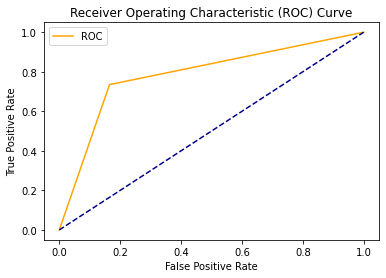

In [137]:
plot_roc_curve(fpr_dt_train, tpr_dt_train)

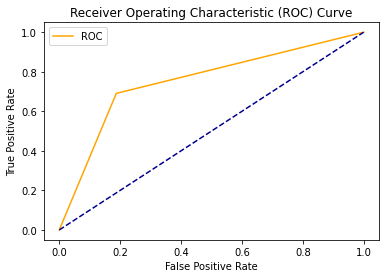

In [138]:
plot_roc_curve(fpr_dt_test, tpr_dt_test)

In [129]:
#Random Forest
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)
y_pred_Rf_train=Rf.predict(X_train)
y_pred_Rf_test=Rf.predict(X_test)
Accuracy_Rf_train=accuracy_score(y_train,y_pred_Rf_train)
cm_Rf_train = confusion_matrix(y_train, y_pred_Rf_train)
cr_Rf_train=classification_report(y_train,y_pred_Rf_train)
re_call_Rf_train=recall_score(y_train,y_pred_Rf_train)
precision_Rf_train=precision_score(y_train,y_pred_Rf_train)
f1_Rf_train=f1_score(y_train,y_pred_Rf_train)
#==========================================================
Accuracy_Rf_test=accuracy_score(y_test,y_pred_Rf_test)
cm_Rf_test= confusion_matrix(y_test, y_pred_Rf_test)
cr_Rf_test=classification_report(y_test,y_pred_Rf_test)
re_call_Rf_test=recall_score(y_test,y_pred_Rf_test)
precision_Rf_test=precision_score(y_test,y_pred_Rf_test)
f1_Rf_test=f1_score(y_test,y_pred_Rf_test)
#=========================================================
print("re_call_Rf_train:-",re_call_Rf_train)
print("#"*40)
print("precision_Rf_train:-",precision_Rf_train)
print("#"*40)
print("f1_Rf_train:-",f1_Rf_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_Rf_train)
print("#"*40)
print("Accuracy_Rf_train:-",Accuracy_Rf_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_Rf_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_Rf_train))
print("#"*40)
print("re_call_Rf_test:-",re_call_Rf_test)
print("#"*40)
print("precision_Rf_test:-",precision_Rf_test)
print("#"*40)
print("f1_Rf_test:-",f1_Rf_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_Rf_test)
print("#"*40)
print("Accuracy_Rf_test:-",Accuracy_Rf_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_Rf_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_Rf_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_Rf_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_Rf_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_Rf_test)))


re_call_Rf_train:- 0.9998897889458312
########################################
precision_Rf_train:- 0.999669439700292
########################################
f1_Rf_train:- 0.9997796021819384
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       1.00      1.00      1.00     18147
           1       1.00      1.00      1.00     18147

    accuracy                           1.00     36294
   macro avg       1.00      1.00      1.00     36294
weighted avg       1.00      1.00      1.00     36294

########################################
Accuracy_Rf_train:- 0.9997795778916625
########################################
Confusion Matrix Train:- [[18141     6]
 [    2 18145]]
########################################
col_0      0      1
row_0              
0      18141      6
1          2  18145
########################################
re_call_Rf_test:- 0.6399474375821288
#################################

In [24]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 12.3 MB/s eta 0:00:00


In [32]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df
X = df.drop('Default', axis = 1)
y=df['Default']

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_uniform('max_features', 0.1, 1.0)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=max_features)
    
    return -1.0 * cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

study = optuna.create_study()
study.optimize(objective, n_trials=10)

best_params = study.best_params
best_value = study.best_value

[I 2023-01-31 18:27:51,737] A new study created in memory with name: no-name-bb168f8b-ae83-4921-a760-c1a390ad6b54
[I 2023-01-31 18:30:07,826] Trial 0 finished with value: -0.8198333333333334 and parameters: {'n_estimators': 191, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.8970649251353598}. Best is trial 0 with value: -0.8198333333333334.
[I 2023-01-31 18:30:32,478] Trial 1 finished with value: -0.8212666666666667 and parameters: {'n_estimators': 118, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.4561778597699836}. Best is trial 1 with value: -0.8212666666666667.
[I 2023-01-31 18:32:29,347] Trial 2 finished with value: -0.8199 and parameters: {'n_estimators': 465, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 0.24343478510301333}. Best is trial 1 with value: -0.8212666666666667.
[I 2023-01-31 18:34:15,332] Trial 3 finished with value: -0.82 and parameters: {'n_estimators': 487, 'ma

In [130]:
#Random Forest
Rf=RandomForestClassifier(n_estimators= 424, max_depth= 2, min_samples_split= 7, min_samples_leaf= 7, max_features= 0.2197458578560493)
Rf.fit(X_train,y_train)
y_pred_Rf_train=Rf.predict(X_train)
y_pred_Rf_test=Rf.predict(X_test)
Accuracy_Rf_train=accuracy_score(y_train,y_pred_Rf_train)
cm_Rf_train = confusion_matrix(y_train, y_pred_Rf_train)
cr_Rf_train=classification_report(y_train,y_pred_Rf_train)
re_call_Rf_train=recall_score(y_train,y_pred_Rf_train)
precision_Rf_train=precision_score(y_train,y_pred_Rf_train)
f1_Rf_train=f1_score(y_train,y_pred_Rf_train)
#==========================================================
Accuracy_Rf_test=accuracy_score(y_test,y_pred_Rf_test)
cm_Rf_test= confusion_matrix(y_test, y_pred_Rf_test)
cr_Rf_test=classification_report(y_test,y_pred_Rf_test)
re_call_Rf_test=recall_score(y_test,y_pred_Rf_test)
precision_Rf_test=precision_score(y_test,y_pred_Rf_test)
f1_Rf_test=f1_score(y_test,y_pred_Rf_test)
#=========================================================
print("re_call_Rf_train:-",re_call_Rf_train)
print("#"*40)
print("precision_Rf_train:-",precision_Rf_train)
print("#"*40)
print("f1_Rf_train:-",f1_Rf_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_Rf_train)
print("#"*40)
print("Accuracy_Rf_train:-",Accuracy_Rf_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_Rf_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_Rf_train))
print("#"*40)
print("re_call_Rf_test:-",re_call_Rf_test)
print("#"*40)
print("precision_Rf_test:-",precision_Rf_test)
print("#"*40)
print("f1_Rf_test:-",f1_Rf_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_Rf_test)
print("#"*40)
print("Accuracy_Rf_test:-",Accuracy_Rf_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_Rf_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_Rf_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_Rf_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_Rf_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_Rf_test)))

re_call_Rf_train:- 0.5867085468672508
########################################
precision_Rf_train:- 0.7851769911504425
########################################
f1_Rf_train:- 0.6715867158671587
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.67      0.84      0.75     18147
           1       0.79      0.59      0.67     18147

    accuracy                           0.71     36294
   macro avg       0.73      0.71      0.71     36294
weighted avg       0.73      0.71      0.71     36294

########################################
Accuracy_Rf_train:- 0.7130930732352455
########################################
Confusion Matrix Train:- [[15234  2913]
 [ 7500 10647]]
########################################
col_0      0      1
row_0              
0      15234   2913
1       7500  10647
########################################
re_call_Rf_test:- 0.5915462111257118
################################

In [131]:
#### Calculate the ROC Curve Random Forest
fpr_Rf_train, tpr_Rf_train, thresholds_Rf_train = roc_curve(y_train,y_pred_Rf_train)
fpr_Rf_test, tpr_Rf_test, thresholds_Rf_test = roc_curve(y_test,y_pred_Rf_test)

In [132]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

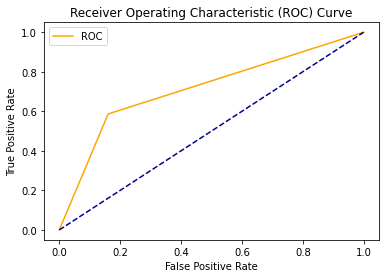

In [133]:
plot_roc_curve(fpr_Rf_train, tpr_Rf_train)

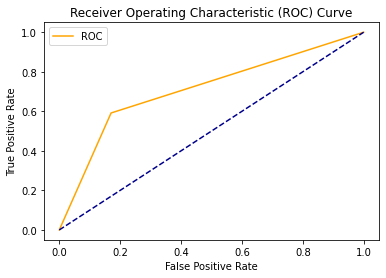

In [134]:
plot_roc_curve(fpr_Rf_test, tpr_Rf_test)

In [32]:
# Xgboost Classifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb_train=xgb.predict(X_train)
y_pred_xgb_test=xgb.predict(X_test)
Accuracy_xgb_train=accuracy_score(y_train,y_pred_xgb_train)
cm_xgb_train = confusion_matrix(y_train, y_pred_xgb_train)
cr_xgb_train=classification_report(y_train,y_pred_xgb_train)
re_call_xgb_train=recall_score(y_train,y_pred_xgb_train)
precision_xgb_train=precision_score(y_train,y_pred_xgb_train)
f1_xgb_train=f1_score(y_train,y_pred_xgb_train)
#==========================================================
Accuracy_xgb_test=accuracy_score(y_test,y_pred_xgb_test)
cm_xgb_test= confusion_matrix(y_test, y_pred_xgb_test)
cr_xgb_test=classification_report(y_test,y_pred_xgb_test)
re_call_xgb_test=recall_score(y_test,y_pred_xgb_test)
precision_xgb_test=precision_score(y_test,y_pred_xgb_test)
f1_xgb_test=f1_score(y_test,y_pred_xgb_test)
#=========================================================
print("re_call_xgb_train:-",re_call_xgb_train)
print("#"*40)
print("precision_xgb_train:-",precision_xgb_train)
print("#"*40)
print("f1_xgb_train:-",f1_xgb_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_xgb_train)
print("#"*40)
print("Accuracy_xgb_train:-",Accuracy_xgb_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_xgb_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_xgb_train))
print("#"*40)
print("re_call_xgb_test:-",re_call_xgb_test)
print("#"*40)
print("precision_xgb_test:-",precision_xgb_test)
print("#"*40)
print("f1_xgb_test:-",f1_xgb_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_xgb_test)
print("#"*40)
print("Accuracy_Rf_test:-",Accuracy_xgb_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_xgb_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_xgb_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_xgb_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_xgb_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_xgb_test)))

re_call_xgb_train:- 0.875185899201322
########################################
precision_xgb_train:- 0.9606989539875446
########################################
f1_xgb_train:- 0.9159508848792299
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.89      0.96      0.92     18155
           1       0.96      0.88      0.92     18155

    accuracy                           0.92     36310
   macro avg       0.92      0.92      0.92     36310
weighted avg       0.92      0.92      0.92     36310

########################################
Accuracy_xgb_train:- 0.9196915450289177
########################################
Confusion Matrix Train:- [[17505   650]
 [ 2266 15889]]
########################################
col_0      0      1
row_0              
0      17505    650
1       2266  15889
########################################
re_call_xgb_test:- 0.8190204260926861
############################

In [81]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_features=4, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)
xgboost =  xgb.XGBClassifier(objective='binary:logistic')
param_dist = {"n_estimators":  [50,100,110, 120,130],
              "max_depth": range(3, 11, 1),
              "random_state":[0,50,100]}

model=RandomizedSearchCV(estimator=xgboost,param_distributions=param_dist,scoring='roc_auc',verbose=10,n_jobs=-1)
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(3, 11),
                                        'n_estimators': [50, 100, 110, 120,
                                                         130],
                                        'random_state': [0, 50, 100]},
                   scoring='roc_auc', verbose=10)

In [82]:
model.best_params_

{'random_state': 100, 'n_estimators': 130, 'max_depth': 7}

In [33]:
# Xgboost Classifier
xgb=XGBClassifier(random_state=100, n_estimators= 130, max_depth= 7)
xgb.fit(X_train,y_train)
y_pred_xgb_train=xgb.predict(X_train)
y_pred_xgb_test=xgb.predict(X_test)
Accuracy_xgb_train=accuracy_score(y_train,y_pred_xgb_train)
cm_xgb_train = confusion_matrix(y_train, y_pred_xgb_train)
cr_xgb_train=classification_report(y_train,y_pred_xgb_train)
re_call_xgb_train=recall_score(y_train,y_pred_xgb_train)
precision_xgb_train=precision_score(y_train,y_pred_xgb_train)
f1_xgb_train=f1_score(y_train,y_pred_xgb_train)
#==========================================================
Accuracy_xgb_test=accuracy_score(y_test,y_pred_xgb_test)
cm_xgb_test= confusion_matrix(y_test, y_pred_xgb_test)
cr_xgb_test=classification_report(y_test,y_pred_xgb_test)
re_call_xgb_test=recall_score(y_test,y_pred_xgb_test)
precision_xgb_test=precision_score(y_test,y_pred_xgb_test)
f1_xgb_test=f1_score(y_test,y_pred_xgb_test)
#=========================================================
print("re_call_xgb_train:-",re_call_xgb_train)
print("#"*40)
print("precision_xgb_train:-",precision_xgb_train)
print("#"*40)
print("f1_xgb_train:-",f1_xgb_train)
print("#"*40)
print("Classifictioan Report Train:- ",cr_xgb_train)
print("#"*40)
print("Accuracy_xgb_train:-",Accuracy_xgb_train)
print("#"*40)
print("Confusion Matrix Train:-",cm_xgb_train)
print("#"*40)
print(pd.crosstab(y_train,y_pred_xgb_train))
print("#"*40)
print("re_call_xgb_test:-",re_call_xgb_test)
print("#"*40)
print("precision_xgb_test:-",precision_xgb_test)
print("#"*40)
print("f1_xgb_test:-",f1_xgb_test)
print("#"*40)
print("Classifictioan Report Test:- ",cr_xgb_test)
print("#"*40)
print("Accuracy_xgb_test:-",Accuracy_xgb_test)
print("#"*40)
print("Confusion Matrix Test:-",cm_xgb_test)
print("#"*40)
print(pd.crosstab(y_test,y_pred_xgb_test))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred_xgb_test)
print('ROC-AUC Score:',auc_score)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train,y_pred_xgb_train)))
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test,y_pred_xgb_test)))

re_call_xgb_train:- 0.9194161388047369
########################################
precision_xgb_train:- 0.9795199812217593
########################################
f1_xgb_train:- 0.9485168769178316
########################################
Classifictioan Report Train:-                precision    recall  f1-score   support

           0       0.92      0.98      0.95     18155
           1       0.98      0.92      0.95     18155

    accuracy                           0.95     36310
   macro avg       0.95      0.95      0.95     36310
weighted avg       0.95      0.95      0.95     36310

########################################
Accuracy_xgb_train:- 0.9500963921784632
########################################
Confusion Matrix Train:- [[17806   349]
 [ 1463 16692]]
########################################
col_0      0      1
row_0              
0      17806    349
1       1463  16692
########################################
re_call_xgb_test:- 0.813529540962003
############################

In [102]:
#### Calculate the ROC Curve Xgboost Classifier
fpr_xbg_train, tpr_xbg_train, thresholds_xbg_train = roc_curve(y_train,y_pred_xgb_train)
fpr_xbg_test, tpr_xbg_test, thresholds_xbg_test = roc_curve(y_test,y_pred_xgb_test)


In [103]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

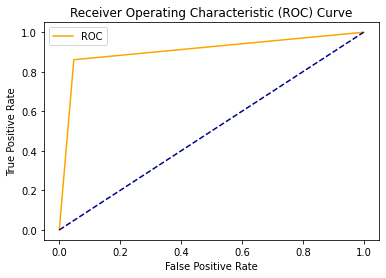

In [104]:
plot_roc_curve(fpr_xbg_train,tpr_xbg_train)

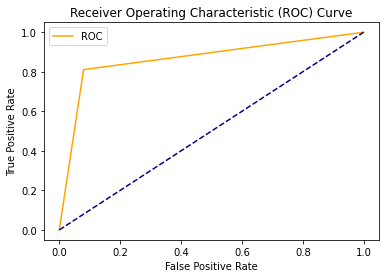

In [105]:
plot_roc_curve(fpr_xbg_test,tpr_xbg_test)

* **Prediction with Logestic Regression with train accuracy score 70% and test accuracy score 70%**

* **Prediction with Decision Tree  with train accuracy score 99% and test accuracy score 71%**

* **Prediction with Random Forest with train accuracy score 99% and test accuracy score 75%**

* **Prediction with xgboost Classifier with train accuracy score 95% and test accuracy score 86%**